In [ ]:
import numpy as np
import pandas as pd
import os, random

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore', message="DataFrame is highly fragmented")
import pickle

 The code snippet provided appears to be a combination of Python imports and settings that relate to loading data, preprocessing images, feature engineering, training machine learning classifiers, assessing classifier performance, and configuring the environment.
 Let's walk through each section and discuss the relevant programming concepts: ### Imports
 - **Numpy & pandas**: These are standard libraries for numerical computation and data manipulation respectively.
 Numpy offers support for multi-dimensional arrays and matrix operations while pandas provides DataFrame structures.
 - **os & random**: `os` is a library providing functionality to interact with the operating system.
 `random` is used for generating random numbers for various purposes like shuffling datasets.
 - **tqdm.notebook**: This module is used for displaying progress bars in Jupyter notebooks.
 It helps track long-running operations such as loops or file processing.
 - **sklearn**: Short for Scikit-Learn, it is one of the most popular libraries for traditional machine learning tasks.
 The modules being imported are: - `train_test_split`: Splits arrays or matrices into training and test subsets.
 - `LabelEncoder`: Converts categorical text labels into a numeric format so they can be used in algorithms that require numerical input.
 - Various classifiers (`RandomForestClassifier`, `SVC`, etc.)
 as well as metrics functions.
 - **tensorflow.keras**: Keras within Tensorflow is an open-source neural network library written in Python designed to enable fast experimentation with deep neural networks.
 - `load_img` and `img_to_array`: Utilities from Keras' preprocessing.image module, used to load image files as PIL instances (Python Imaging Library) and convert them into numpy arrays.
 - **keras.utils.to_categorical**: Converts class vectors (integers)
 The code imports necessary libraries and modules for data analysis and machine learning, including sklearn, tensorflow, seaborn, matplotlib, plotly, and pickle.
 It also sets up warnings to be ignored and defines functions for data analysis and model evaluation.

# **DATA ACQUISITION**

> *Obtaining the medical image dataset containing images of different cancer types.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/MyDrive/Data/train/"

# class_folder_names = os.listdir(base_dir)
# class_folder_names

The code stores the path to the "train" folder in the "Data" directory within the user's Google Drive in a variable called "base_dir".

In [ ]:
class_folder_names = ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',]
class_folder_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

 The code defines a list called `class_folder_names` that contains strings.
 Each string in the list appears to represent a classification or category that could be associated with medical diagnoses, specifically related to lung cancer.
 Let's analyze the individual elements (the folder names): 1.
 `'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'`: This can be broken down into several parts: - `adenocarcinoma`: A type of cancer that forms in mucus-secreting glands throughout the body but often found in the lung.
 - `left.lower.lobe`: Indicates that the location of the adenocarcinoma is in the left lower lobe of the lung.
 - `T2`, `N0`, `M0`, `Ib`: These appear to be part of a staging system, commonly used by doctors for describing cancer's size and if it has spread.
 The "T" denotes tumor size, "N" indicates whether lymph nodes are involved, "M" stands for metastasis (whether it has spread), and Ib likely indicates an overall stage, where here stage I is subdivided further into categories like Ia, Ib.
 - `'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'`: - `large.cell.carcinoma`: A subtype of non-small cell lung cancer characterized by large cells when viewed under a microscope.
 - `left.hilum`: Suggests this large cell carcinoma is located at or near the hilum on the left side, which is where structures like blood vessels and bronchi enter and leave the lung.
 - Like before, `T2`,
 The code creates a list of different types of lung cancer and prints the list.

In [ ]:
class_dict = {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib':"Adenocarcinoma",'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa':'large.cell.carcinoma','normal':'normal','squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa':"squamous.cell.carcinoma"}

* The code creates a dictionary with keys representing different types of lung cancer and their corresponding values as the type of cancer.

In [ ]:
class_dict

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 'Adenocarcinoma',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 'large.cell.carcinoma',
 'normal': 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 'squamous.cell.carcinoma'}

In [ ]:
image_paths = []

for cls in class_folder_names:
    print(cls)
    for file_name in os.listdir(base_dir+cls):
        if file_name.split(".")[-1] == 'jpg' or file_name.split(".")[-1] == 'png':
            image_paths.append(os.path.join(base_dir,cls,file_name))

print("A Total images = ", len(image_paths))
print("----------------------")

image_paths[0:10]

adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
normal
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
A Total images =  1910
----------------------


['/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (7).png',
 '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png',
 '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (8).png',
 '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000021 (13).png',
 '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000020 (12).png',
 '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000005 (10).png',
 '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000013 (4).png',
 '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000020 (7).png',
 '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000015 (14).png',
 '/content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000017 (7).png']

- `image_paths = []`: This line initializes an empty list called `image_paths`.
 We'll be appending to this list paths to image files we find that satisfy certain conditions (in this case, having file extensions 'jpg' or 'png').
- The outer loop `for cls in class_folder_names:` will iterate over each element inside the `class_folder_names`, which appears to be a list that contains names of directories (folder names) where classes of images are stored: ```python for cls in class_folder_names: print(cls) #... ``` 3.
 Inside the outer loop, we have `print(cls)`, which simply prints the name of the current directory that the code is looking at.
 It’s like a debug message indicating what `cls` value is being processed.
- Next comes another loop: ```python for file_name in os.listdir(base_dir+cls): ``` Here, for each class (`cls`) folder specified in `class_folder_names`, it lists all files in that folder by executing `os.listdir(base_dir+cls)`.
 The provided `base_dir` might be a string representing a path prefixing all class folders; thus, you concatenate it with each class folder name (`cls`) to provide full directory paths to look inside.
 So essentially this provides a listing of all items inside the respective class folder.
- As per our condition imposed on filenames: ```python if file_name.split(".
 ")[-1] == 'jpg' or file_name.split(".
 ")[-1] == 'png': # ... ``` For every item (file or directory) listed
 * The code iterates through the class folder names and appends the paths of all jpg and png files in those folders to a list called image_paths.
 * It then prints the total number of images found and displays the first 10 paths in the list.

In [ ]:
classes = []

for image_path in image_paths:
    classes.append(image_path.split('/')[-2])

classes[0:5]

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']



*   The code creates an empty list called "classes" and then iterates through a list of image paths, splitting each path by the '/' character and taking the second to last element.



---------------------------------------------------------------------------------------------

  Data acquisition is done.

---------------------------------------------------------------------------------------------

# **DATA PREPROCESSING**

In [ ]:


# Assuming you want to resize all images to (width, height)
target_size = (224, 224)

inputs = []

for i in tqdm(image_paths):
    image = load_img(i, target_size=target_size)
    img_array = img_to_array(image)
    inputs.append(img_array)

X = np.array(inputs)


  0%|          | 0/1910 [00:00<?, ?it/s]

Below is an explanation of the different parts of the code in detail: - `target_size = (224, 224)`: This line initializes a tuple named `target_size` with two integers, 224 by 224.
 These numbers define the dimensions to which all the images in `image_paths` will be resized.
 A size of 224x224 pixels is common for models that are based on architectures like VGG16, which were designed around that input size.
 - `inputs = []`: Here we're initializing an empty list called `inputs`.
 This list will eventually contain all the processed images.
 - `for i in tqdm(image_paths):`: The loop starts by iterating over each path in the iterable `image_paths`.
 `tqdm()` is a utility from the tqdm library; it's typically used to display progress bars to give feedback during lengthy operations (such as loading and processing a bunch of image files).
 - `image = load_img(i, target_size=target_size)`: For every image path encountered in our loop, this function call attempts to load an image from file using Keras's image pre-processing helpers (`load_img`).
 It includes one argument (`i`) which is expected to be a file path to an image.
 The second argument is specifying keyword arguments where it mentions that each loaded image should resize itself according to values given by `target_size`.
 - `img_array = img_to_array(image)`: Once the image is loaded and resized, this function converts the loaded Image object into a numpy array structure.
 * The code attempts to resize a set of images to 224x224 pixels, convert them to arrays, and store them in a numpy array called X.

In [ ]:
le = LabelEncoder()
y = le.fit_transform(classes)
y = np.array(y)

print(y)

[0 0 0 ... 3 3 3]


* The code is used to encode the classes and transform them into an array.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train data = ", X_train.shape,  y_train.shape)
print("Test data = ", X_test.shape,  y_test.shape)

Train data =  (1528, 224, 224, 3) (1528,)
Test data =  (382, 224, 224, 3) (382,)


`X` and `y` are likely to be variables that represent features and targets (or labels) for supervised learning.
 The features (`X`) can be thought of as input data used to make predictions, while the targets (`y`) are the outputs you're trying to predict.
 - The function `train_test_split()` is used to split these datasets into two separate sets each: one for training our model (hence 'train') and one for testing its performance (thus 'test').
 - It's common practice to split your data like this so that you can train on one portion of your dataset and validate your model's performance on an unseen portion to get an idea of how well it might perform on real-world data.
 - This avoids problems like overfitting where the model performs very well on training data but poorly on new, unseen data.
 - The argument `test_size=0.2` specifies that 20% of the total dataset should be allocated for testing purposes; consequently, 80% remains for training.
 - The function returns four arrays which are being unpacked here: - `X_train`: This is a set with 80% of all available feature samples chosen at random since we are not specifying any kind of stratification or random state.
 - `y_train`: Contains corresponding labels to `X_train`.
 - `X_test`: Comprises 20% of feature samples.
 *The code splits the data into training and testing sets, with 80% of the data being used for training and 20% for testing.
 *It then prints the shape of the training and testing data sets.

In [ ]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

print("Flattened Train data = ", X_train_flattened.shape,  y_train.shape)
print("Flattened Test data = ", X_test_flattened.shape,  y_test.shape)

Flattened Train data =  (1528, 150528) (1528,)
Flattened Test data =  (382, 150528) (382,)


* The code reshapes the training and test data into a flattened array and prints the shape of the flattened arrays along with the shape of the corresponding labels.

# **DATA VISUALIZATION**

In [ ]:
# Create a dictionary to store indices of samples for each class
unique_classes = np.unique(y_train)
class_indices = {class_id: np.where(y_train == class_id)[0] for class_id in unique_classes}


* The code creates a dictionary that maps each unique class in the training data to the indices of the data points belonging to that class.

In [ ]:
# ploting total samples for each class

images_count = [len(class_indices[key]) for key in class_indices.keys()]

fig = px.bar(x=class_dict.values(), y=images_count, color= class_dict.values())

fig.update_layout(xaxis_title='Disease', yaxis_title='Count', title="Total samples for each class", )
fig.update_traces(texttemplate='%{y}', textposition='inside')

fig.show()

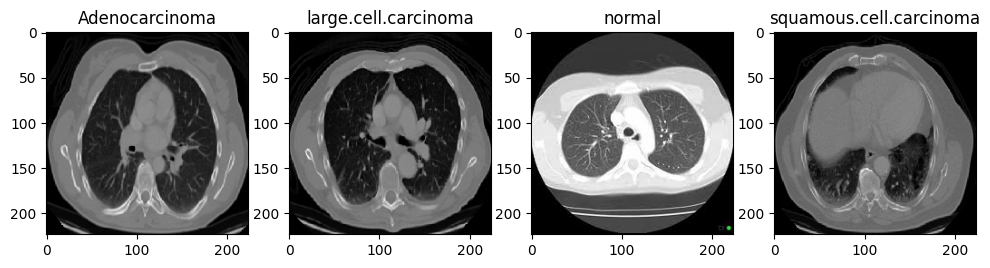

In [ ]:
# Displaying sample images for each class randomly.

plt.figure(figsize=(12, 5))

for i, (class_id, indices) in enumerate(class_indices.items()):
    random_index = np.random.choice(indices)
    random_image = X_train[random_index].astype(np.uint8)

    plt.subplot(1, len(unique_classes), i + 1)
    plt.imshow(random_image)
    plt.title(class_dict[class_folder_names[class_id]])
    plt.axis('on')

plt.show()

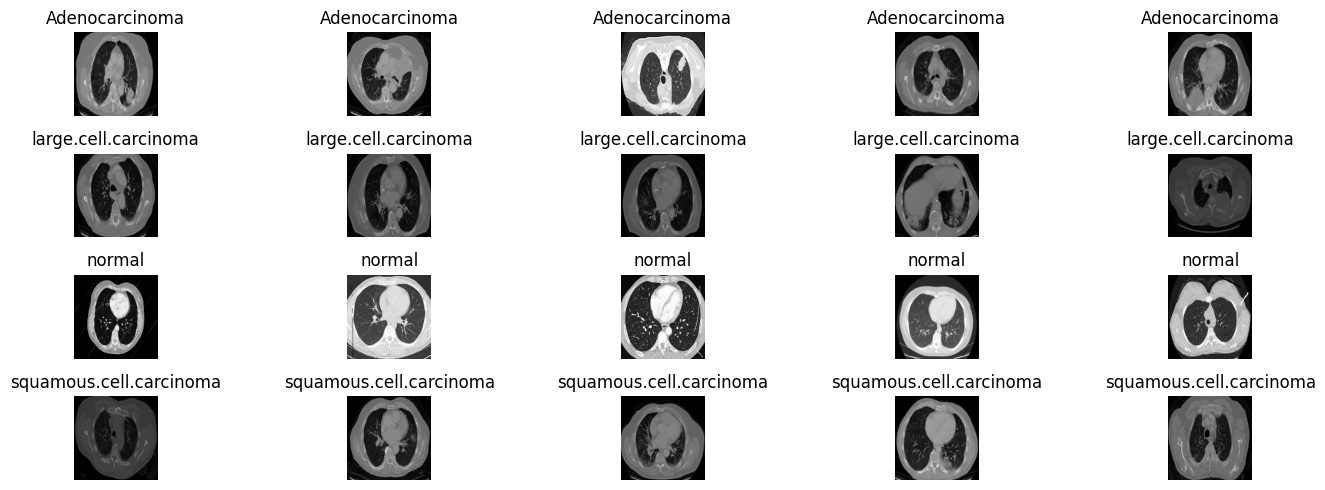

In [ ]:
# Displaying 7 sample images for each class randomly.

selected_classes = [0,1,2, 3]
total_images_per_class = 5

plt.figure(figsize=(15, 5))

for c, selected_class in enumerate(selected_classes):

    # Get indices of samples for the selected class
    indices_for_selected_class = np.where(y_train == selected_class)[0]
    random_indices = np.random.choice(indices_for_selected_class, total_images_per_class, replace=False)

    # Display images for the current selected class
    for i, idx in enumerate(random_indices):
        plt.subplot(len(selected_classes), total_images_per_class, c * total_images_per_class + i + 1)
        plt.imshow(X_train[idx].astype(np.uint8))
        plt.title(class_dict[class_folder_names[selected_class]])
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Reshape the image data to a 2D array
num_samples, height, width, channels = X_train.shape

X_train_reshaped = X_train.reshape(num_samples, height * width * channels)
X_train_flattened.shape

(1528, 150528)

* The code reshapes the X_train data to have a flattened shape with the same number of samples, but with a two dimension representing the combined height, width, and channels of the original data.

In [ ]:
# Apply PCA to reduce dimensions to 2 for visualization

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flattened)
X_train_pca.shape

(1528, 2)

* The code uses the PCA algorithm to reduce the dimensionality of the data in X_train_flattened to 2 components and stores the transformed data in X_train_pca, returning its shape.


In [ ]:
# Visualize the PCA-transformed data

hover_text = [f"Index: {index}" for index in range(len(X_train_pca))]

fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=y_train, hover_name=hover_text, symbol=y_train, title='PCA Visualization of Image Classes')
fig.update_traces(marker=dict(size=15))
fig.update_layout(xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')
fig.update_layout(coloraxis_showscale=False)

fig.show()

* The code creates a scatter plot visualization of the principal components of the training data, with each point colored and labeled according to its corresponding class.
* The hover text displays the index of each point, and the size and layout of the plot are adjusted for better visualization.

In [ ]:
# Finding outliers by talking high distance sum values

pca_sums = np.sum(X_train_pca, axis=1)

outlier_indexes = []
for idx, row in enumerate(pca_sums):
    if row>15000:
        print(row, idx)
        outlier_indexes.append(idx)

30557.47 4
43128.65 20
22001.52 22
30557.47 31
43427.363 40
26020.05 42
26020.05 63
30491.908 64
35334.594 69
40331.11 79
53655.727 90
24008.979 96
44256.28 103
19145.7 109
43128.65 118
21942.836 120
15889.3 129
43446.453 135
25834.982 144
44394.54 146
40122.72 150
26433.225 151
43446.453 152
26020.05 159
46671.32 171
15889.3 172
40151.27 176
19145.7 177
36269.453 179
25975.127 181
26020.05 187
24008.979 197
19145.7 199
36139.29 204
26020.05 209
17968.418 220
36139.29 221
46671.32 229
25975.127 231
21942.836 234
36401.117 238
35334.594 250
19145.7 251
19145.7 262
24008.979 275
36401.117 292
25834.982 300
22939.344 302
35334.594 303
24008.979 313
36401.117 318
44256.28 320
36401.117 321
30608.094 325
22008.582 332
33400.83 337
25975.127 339
30565.29 348
28586.852 350
28406.021 351
26978.709 353
22939.344 358
33400.83 362
30565.29 366
41995.848 367
42577.938 383
19145.7 388
21942.836 397
43128.65 414
40331.11 415
44394.54 425
25975.127 427
17504.0 429
31782.29 430
22264.91 432
30565.29 4

* The code attempts to find the indexes of rows in the X_train_pca array that have a sum greater than 15000 and store them in a list called outlier_indexes.

In [ ]:
pca_df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y_train
pca_df['Index'] = pca_df.index
pca_df.head()

,PC1,PC2,Class,Index
0,-9256.075195,-2853.189209,0,0
1,-302.239777,-7022.617676,0,1
2,-10154.521484,1313.477417,1,2
3,1676.731445,-3722.596191,1,3
4,26291.269531,4266.200684,2,4


* The code creates a new dataframe called pca_df with the data from X_train_pca and adds two columns, 'Class' and 'Index', before displaying the first few rows of the dataframe

In [ ]:
# Create side-by-side box plots for PC1 and PC2 using Plotly

fig = px.box(pca_df, x='Class', y=['PC1', 'PC2'], points="all", facet_col="variable",
             title='Box Plots of PCA - Principal Components 1 and 2 by Class', hover_data={'Index': True})
fig.update_layout(width=1200, height=500)
fig.show()

# **ML MODEL TRAINING**

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),

}

# *MODEL SELECTION*

In [ ]:
from sklearn.linear_model import LogisticRegression

accuracies = {}

for name, model in models.items():
    if isinstance(model, LogisticRegression):
        # Increase max_iter for Logistic Regression
        model.set_params(max_iter=1000)

    model.fit(X_train_flattened, y_train)
    predictions = model.predict(X_test_flattened)

    accuracy = accuracy_score(y_test, predictions)
    accuracies[name] = accuracy

    print(f"{name} accuracy: {accuracy}")

Random Forest accuracy: 0.9895287958115183
Decision Tree accuracy: 0.9895287958115183
Logistic Regression accuracy: 0.9895287958115183
SVM accuracy: 0.9502617801047121
K-Nearest Neighbors accuracy: 0.8848167539267016


In [ ]:

best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print("Best model = ", best_model )

Best model =  RandomForestClassifier()


In [ ]:
# Train the best model
best_model.fit(X_train_flattened, y_train)
best_predictions = best_model.predict(X_test_flattened)

best_predictions

array([2, 1, 3, 2, 0, 3, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 3, 1, 0, 3, 3,
       0, 2, 0, 3, 2, 3, 2, 0, 2, 2, 0, 0, 2, 3, 3, 0, 2, 2, 3, 1, 1, 0,
       0, 0, 2, 2, 0, 1, 0, 3, 2, 2, 3, 2, 1, 2, 1, 0, 1, 3, 0, 2, 2, 3,
       0, 3, 2, 3, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 3, 2, 0, 2, 3, 2, 1,
       3, 3, 2, 0, 3, 3, 0, 0, 0, 3, 3, 1, 3, 3, 3, 0, 0, 3, 1, 2, 0, 2,
       1, 2, 3, 2, 2, 0, 3, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 3,
       3, 3, 0, 0, 1, 0, 2, 0, 1, 0, 1, 3, 0, 3, 1, 3, 1, 1, 0, 1, 1, 0,
       1, 3, 2, 0, 3, 2, 1, 2, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 3, 0, 0, 2,
       3, 2, 2, 3, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 3, 2, 3, 0,
       0, 0, 0, 0, 2, 3, 2, 3, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1,
       2, 2, 2, 3, 1, 0, 2, 1, 3, 0, 3, 3, 0, 0, 2, 0, 0, 3, 0, 2, 3, 0,
       0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 3,
       3, 3, 2, 0, 0, 2, 3, 1, 3, 1, 3, 0, 1, 0, 3, 3, 0, 2, 0, 2, 2, 3,
       2, 3, 1, 0, 3, 1, 2, 2, 1, 0, 3, 2, 0, 1, 1,

In [ ]:
# Get weights

if best_model_name == 'Random Forest' or best_model_name == 'Decision Tree':
    coefficients = best_model.feature_importances_
    print(coefficients.shape)

elif best_model_name == 'Logistic Regression':
    coefficients = best_model.coef_.ravel()
    print(coefficients.shape)
else:
    coefficients = None

(150528,)


In [ ]:
# ploting weights distribution

if coefficients is not None:
    fig = px.histogram(x=coefficients, nbins=50, labels={'x': 'Coefficient Value'}, title='Distribution of Coefficients (Weights)')
    fig.update_layout(bargap=0.1)
    fig.update_traces(opacity=0.7)
    fig.show()

# **METRICS & REPORTS**

In [ ]:
report = classification_report(y_test, best_predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      0.99      0.99        83
           2       1.00      1.00      1.00        96
           3       0.99      1.00      0.99        85

    accuracy                           1.00       382
   macro avg       1.00      1.00      1.00       382
weighted avg       1.00      1.00      1.00       382



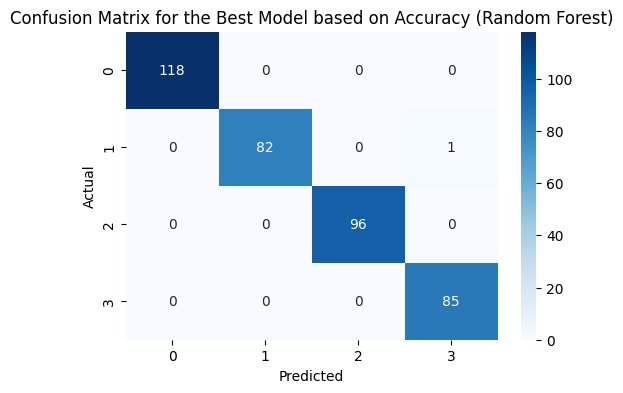

In [ ]:
# Calculate and display the confusion matrix for the best model
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title(f'Confusion Matrix for the Best Model based on Accuracy ({best_model_name})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **MODEL DEPLOYMENT**

In [ ]:
# Save the trained model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
# Load the saved model
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

loaded_model

RandomForestClassifier()

In [ ]:
# Predicting on loaded model with X_test_flattened

predictions = loaded_model.predict(X_test_flattened)
predictions

array([2, 1, 3, 2, 0, 3, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 3, 1, 0, 3, 3,
       0, 2, 0, 3, 2, 3, 2, 0, 2, 2, 0, 0, 2, 3, 3, 0, 2, 2, 3, 1, 1, 0,
       0, 0, 2, 2, 0, 1, 0, 3, 2, 2, 3, 2, 1, 2, 1, 0, 1, 3, 0, 2, 2, 3,
       0, 3, 2, 3, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 3, 2, 0, 2, 3, 2, 1,
       3, 3, 2, 0, 3, 3, 0, 0, 0, 3, 3, 1, 3, 3, 3, 0, 0, 3, 1, 2, 0, 2,
       1, 2, 3, 2, 2, 0, 3, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 3,
       3, 3, 0, 0, 1, 0, 2, 0, 1, 0, 1, 3, 0, 3, 1, 3, 1, 1, 0, 1, 1, 0,
       1, 3, 2, 0, 3, 2, 1, 2, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 3, 0, 0, 2,
       3, 2, 2, 3, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 3, 2, 3, 0,
       0, 0, 0, 0, 2, 3, 2, 3, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1,
       2, 2, 2, 3, 1, 0, 2, 1, 3, 0, 3, 3, 0, 0, 2, 0, 0, 3, 0, 2, 3, 0,
       0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 3,
       3, 3, 2, 0, 0, 2, 3, 1, 3, 1, 3, 0, 1, 0, 3, 3, 0, 2, 0, 2, 2, 3,
       2, 3, 1, 0, 3, 1, 2, 2, 1, 0, 3, 2, 0, 1, 1,

In [ ]:
y_test

array([2, 1, 3, 2, 0, 3, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 3, 1, 0, 1, 3,
       0, 2, 0, 3, 2, 3, 2, 0, 2, 2, 0, 0, 2, 3, 3, 0, 2, 2, 3, 1, 1, 0,
       0, 0, 2, 2, 0, 1, 0, 3, 2, 2, 3, 2, 1, 2, 1, 0, 1, 3, 0, 2, 2, 3,
       0, 3, 2, 3, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 3, 2, 0, 2, 3, 2, 1,
       3, 3, 2, 0, 3, 3, 0, 0, 0, 3, 3, 1, 3, 3, 3, 0, 0, 3, 1, 2, 0, 2,
       1, 2, 3, 2, 2, 0, 3, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 3,
       3, 3, 0, 0, 1, 0, 2, 0, 1, 0, 1, 3, 0, 3, 1, 3, 1, 1, 0, 1, 1, 0,
       1, 3, 2, 0, 3, 2, 1, 2, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 3, 0, 0, 2,
       3, 2, 2, 3, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 3, 2, 3, 0,
       0, 0, 0, 0, 2, 3, 2, 3, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1,
       2, 2, 2, 3, 1, 0, 2, 1, 3, 0, 3, 3, 0, 0, 2, 0, 0, 3, 0, 2, 3, 0,
       0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 3,
       3, 3, 2, 0, 0, 2, 3, 1, 3, 1, 3, 0, 1, 0, 3, 3, 0, 2, 0, 2, 2, 3,
       2, 3, 1, 0, 3, 1, 2, 2, 1, 0, 3, 2, 0, 1, 1,

In [ ]:
# Predicting a single image on loaded model

random_image_path = random.choice(image_paths)
actual_class = random_image_path.split('/')[-2]

print("Random Image Path = ", random_image_path)
print("Its original class = ", actual_class)

Random Image Path =  /content/drive/MyDrive/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000102 (2).png
Its original class =  adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


In [ ]:
# Image preprocessing for prediction

random_image = load_img(random_image_path, target_size=target_size)
random_img_array = img_to_array(random_image)

flattend_img_array = random_img_array.reshape(1, -1)
flattend_img_array.shape

(1, 150528)

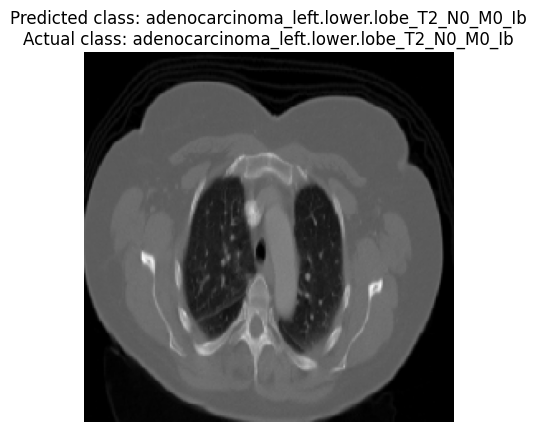

In [ ]:
predictions = loaded_model.predict(flattend_img_array)

predicted_class = class_folder_names[predictions[0]]
actual_class = random_image_path.split('/')[-2]
plt.imshow(random_image)
plt.title(f"Predicted class: {predicted_class}\nActual class: {actual_class}")
plt.axis('off')
plt.show()

normal
2


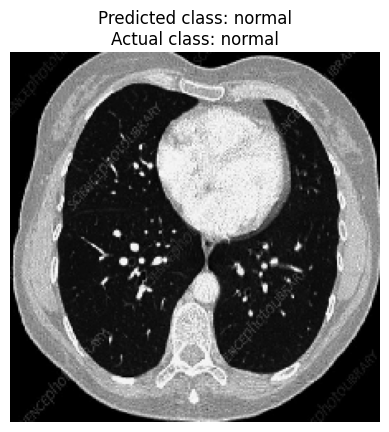

In [ ]:
random_image_path = random.choice(image_paths)
actual_class = random_image_path.split('/')[-2]

print(actual_class)

random_image = load_img(random_image_path, target_size=target_size)
random_img_array = img_to_array(random_image)

flattend_img_array = random_img_array.reshape(1, -1)

predictions = loaded_model.predict(flattend_img_array)

print(predictions[0])


predicted_class = class_folder_names[predictions[0]]
actual_class = random_image_path.split('/')[-2]
plt.imshow(random_image)
plt.title(f"Predicted class: {predicted_class}\nActual class: {actual_class}")
plt.axis('off')
plt.show()

Enter the image path: /content/drive/MyDrive/Data/test/adenocarcinoma/000108 (3).png


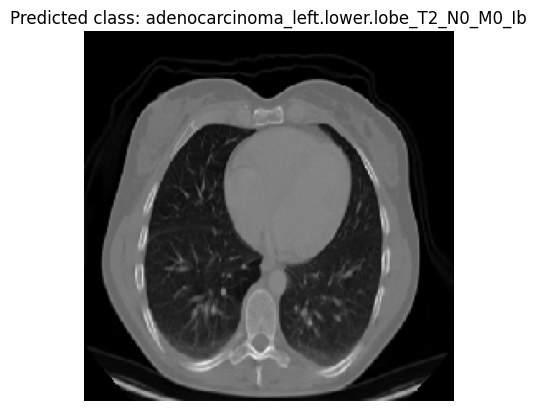

In [ ]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pickle

# Assuming you have loaded the best_model, target_size, and class_folder_names
# best_model = ...
# target_size = ...
# class_folder_names = ...

# Function to preprocess the user input image
def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)
    img_array = img_to_array(image)
    flattened_img_array = img_array.reshape(1, -1)
    return flattened_img_array

# Load the saved model
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Get user input for image path
user_input_path = input("Enter the image path: ")

# Preprocess the user input image
user_input_img = preprocess_image(user_input_path, target_size)

# Make predictions on the user input image
predictions = loaded_model.predict(user_input_img)

# Get the predicted class
predicted_class = class_folder_names[predictions[0]]
actual_class = user_input_path.split('/')[-2]

# Display the user input image with the predicted and actual classes
user_image = load_img(user_input_path, target_size=target_size)
plt.imshow(user_image)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()
